In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('telco-data.csv')
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df['customerID'].is_unique

True

In [22]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


TotalCharges is a String

In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [42]:
for col in df.select_dtypes(include='object'):
    uniques = df[col].unique()
    print(f"\n{col} ({len(uniques)} unique): {uniques[:6]}")


customerID (7043 unique): ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC']

gender (2 unique): ['Female' 'Male']

Partner (2 unique): ['Yes' 'No']

Dependents (2 unique): ['No' 'Yes']

PhoneService (2 unique): ['No' 'Yes']

MultipleLines (3 unique): ['No phone service' 'No' 'Yes']

InternetService (3 unique): ['DSL' 'Fiber optic' 'No']

OnlineSecurity (3 unique): ['No' 'Yes' 'No internet service']

OnlineBackup (3 unique): ['Yes' 'No' 'No internet service']

DeviceProtection (3 unique): ['No' 'Yes' 'No internet service']

TechSupport (3 unique): ['No' 'Yes' 'No internet service']

StreamingTV (3 unique): ['No' 'Yes' 'No internet service']

StreamingMovies (3 unique): ['No' 'Yes' 'No internet service']

Contract (3 unique): ['Month-to-month' 'One year' 'Two year']

PaperlessBilling (2 unique): ['Yes' 'No']

PaymentMethod (4 unique): ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn (2 unique): ['No' 'Yes']


Redundant values: MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

In [32]:
df.groupby('InternetService')['OnlineSecurity'].value_counts(normalize=True)

InternetService  OnlineSecurity     
DSL              No                     0.512598
                 Yes                    0.487402
Fiber optic      No                     0.729005
                 Yes                    0.270995
No               No internet service    1.000000
Name: proportion, dtype: float64

To Merge

In [23]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
missing_tokens = ["?", "None", "none", "N/A", "n/a", " ", "", "NULL", "null"]
df.isin(missing_tokens).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [27]:
missing_value = df['TotalCharges'][df['TotalCharges'].isin(missing_tokens)].unique()
missing_value

array([' '], dtype=object)

In [28]:
df['TotalCharges'].replace(missing_value, pd.NA, inplace=True)
df.isna().sum()

/var/folders/_2/_yhjp4h153l3658w2fh53v580000gn/T/ipykernel_54702/1593800164.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].replace(missing_value, pd.NA, inplace=True)


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [33]:
df.loc[df['TotalCharges'].isna(), 'tenure'].value_counts()

tenure
0    11
Name: count, dtype: int64

New customers, no billings yet, null values are not mistakes

In [34]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

In [35]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [36]:
df[['tenure','MonthlyCharges','TotalCharges']].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


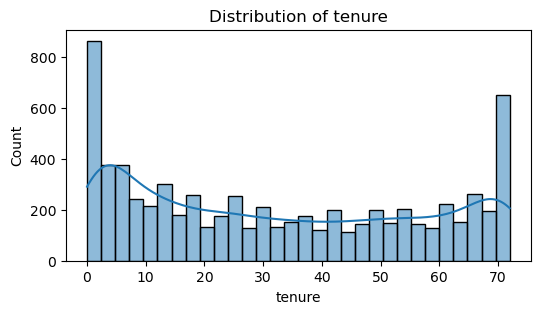

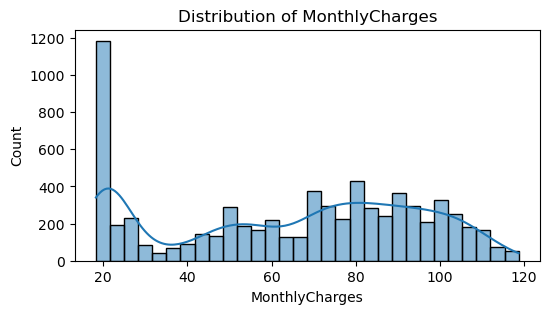

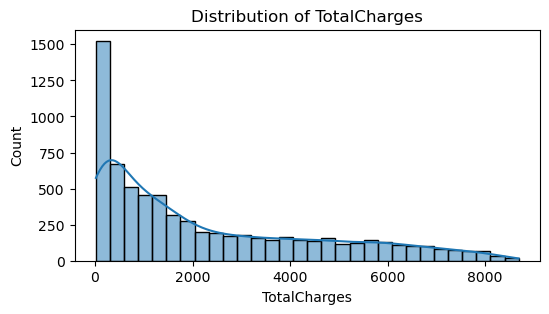

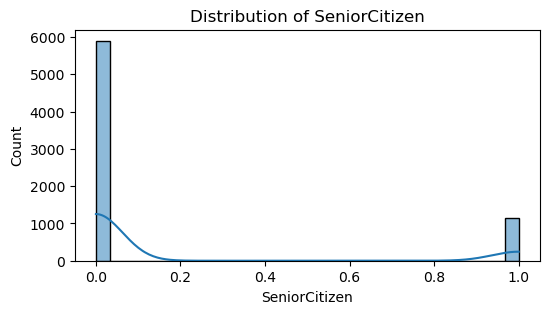

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

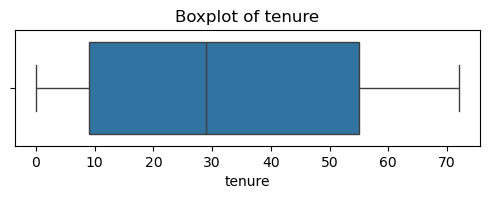

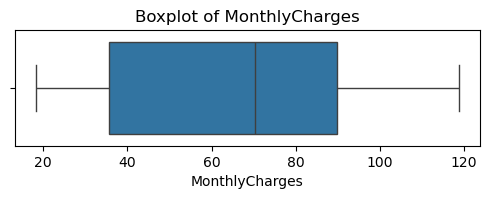

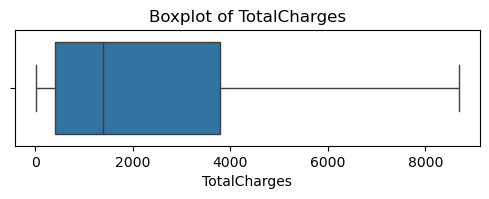

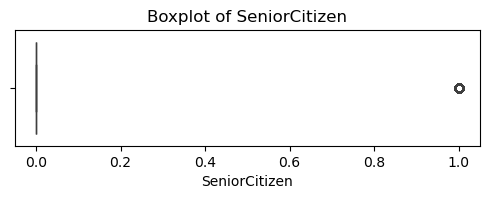

In [39]:
for col in num_cols:
    plt.figure(figsize=(6,1.5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

- tenure - right-skewed, majority under 20 months → new customers dominate.
- MonthlyCharges - wide spread, cluster around 20–90 → pricing tiers visible.
- TotalCharges - long tail, proportional to tenure (expected).
- SeniorCitizen - binary (0/1), 16% of customers seniors.

In [41]:
cat_cols = df.select_dtypes(include='object').columns.drop('customerID')

for col in cat_cols:
    print(f"\n{col}")
    print(df[col].value_counts(normalize=True) * 100)


gender
gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64

Partner
Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64

Dependents
Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64

PhoneService
PhoneService
Yes    90.316626
No      9.683374
Name: proportion, dtype: float64

MultipleLines
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64

InternetService
InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64

OnlineSecurity
OnlineSecurity
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: proportion, dtype: float64

OnlineBackup
OnlineBackup
No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name: proportion, dtype: float64

DeviceProtection
DeviceProtectio

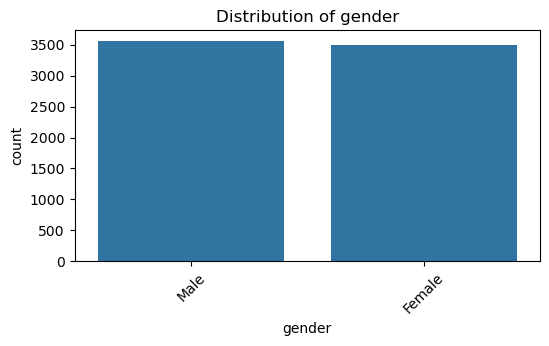

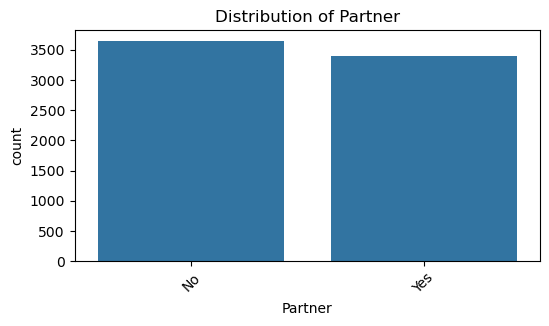

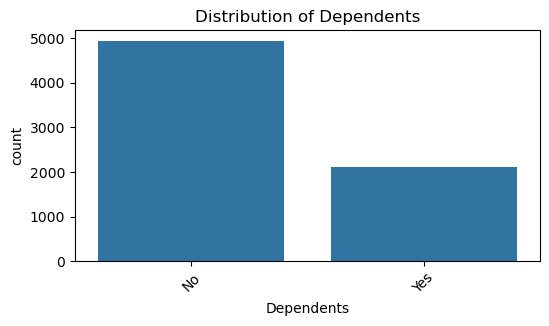

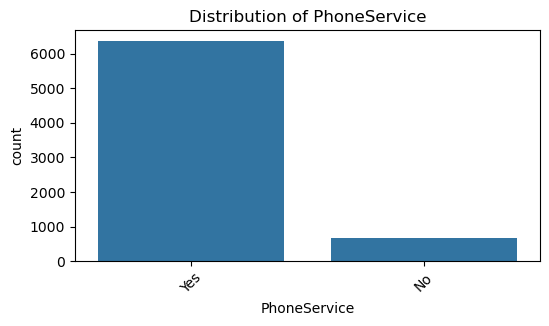

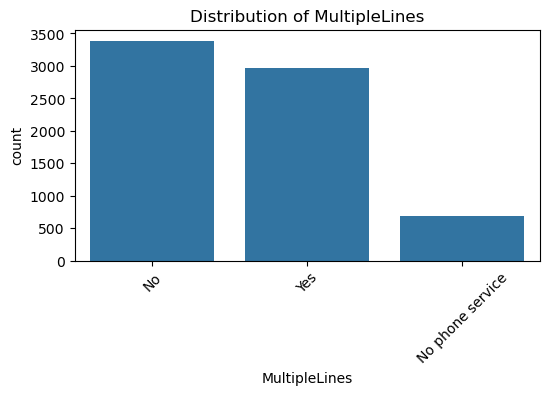

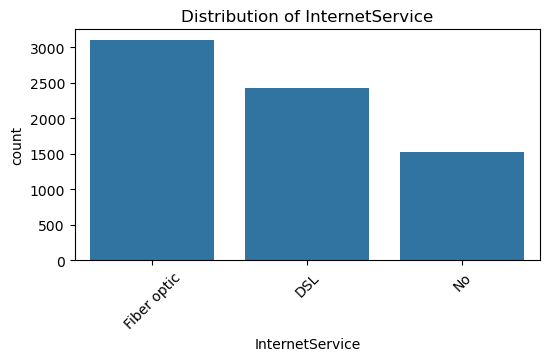

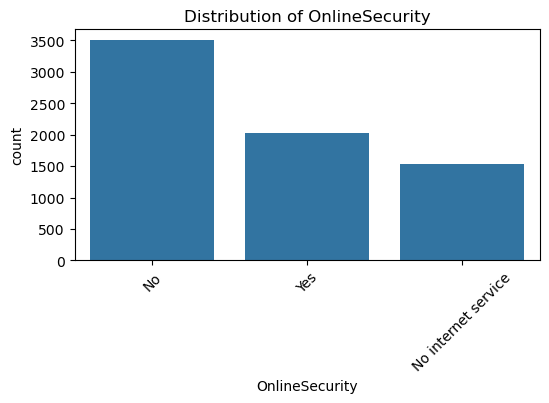

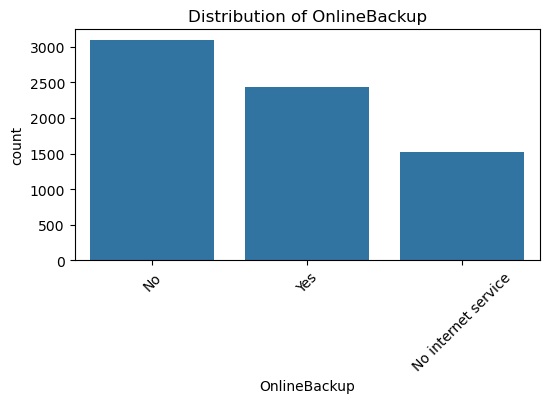

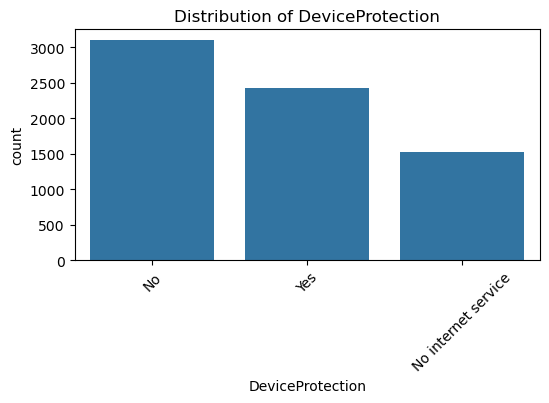

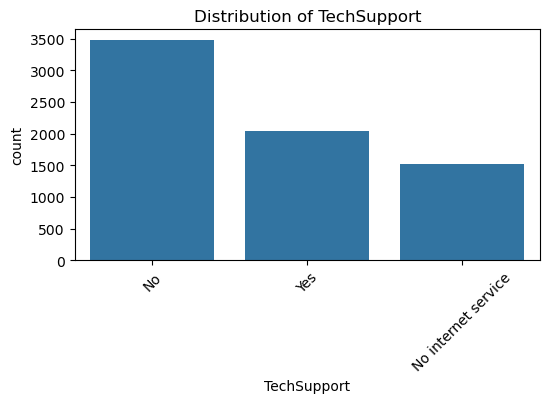

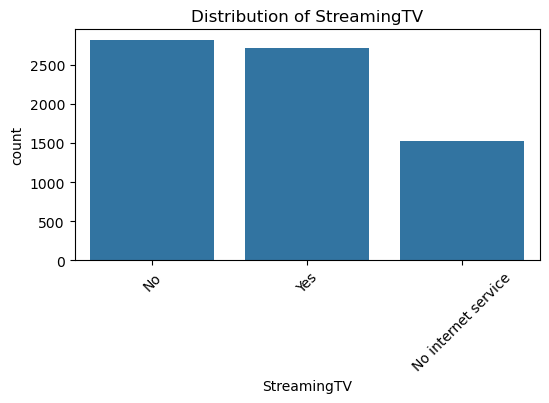

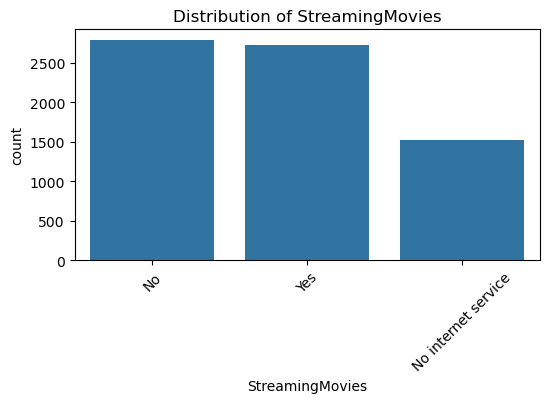

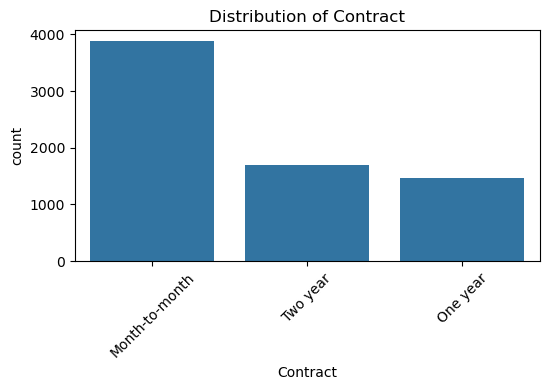

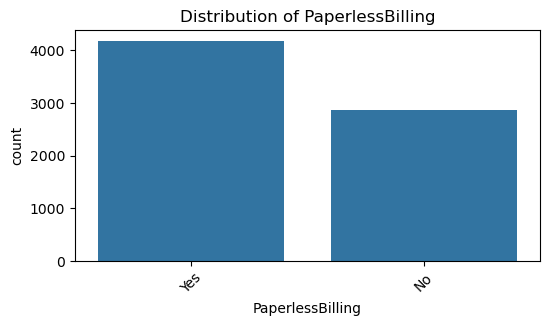

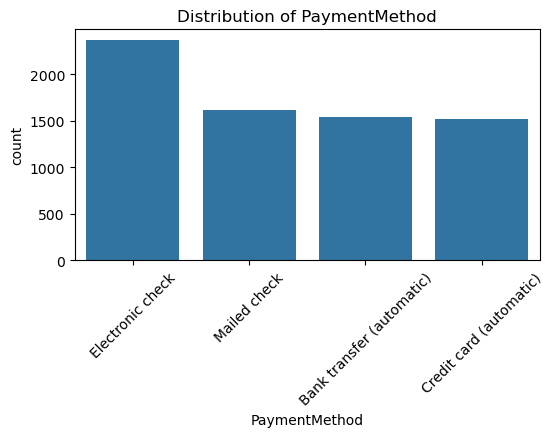

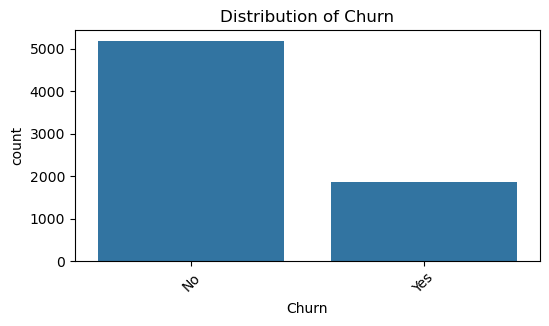

In [43]:
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

The categorical landscape is dominated by month-to-month contracts (56 %), electronic check payments (33 %) and fiber-optic internet (44 %).
Online add-on services show high proportion of ‘No’ responses, suggesting under-utilization of bundled features.
Several service-related columns include redundant categories (‘No internet service’), which will be merged in the cleaning pipeline.

In [44]:
df.groupby('Churn')[['tenure','MonthlyCharges','TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.569965,61.265124,2555.344141
Yes,17.979133,74.441332,1531.796094


In [45]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index')

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


The first table shows mean values of key numeric features grouped by churn status.  
The second cross-tab normalizes churn proportions within each contract category.